In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 데이터셋 출처
- book crossing
- https://www.bookcrossing.com/

In [2]:
path = 'C:/Users/Shiwon Kim/0_ML/test4'
books = pd.read_csv(path + '/' + 'BX-Books.csv', encoding='latin-1', sep=';',
                    error_bad_lines=False, warn_bad_lines=False)

# UnicodeDecodeError(인코딩 에러) 발생 시 적절한 인코딩 방식을 검색한 후 적용
# encoding='latin-1'

# ParserError: 데이터의 형태가 기존에 작성했던 데이터의 형태와 달라서 발생
# (1) 파일을 메모장으로 열어보면 csv 파일임에도 구분자가 ',' 아닌 ';'
# sep=';' -> 파일을 열 때 구분자를 ';'으로 지정(',' default)
# (2) 전체 데이터 중 일부 소수의 행이 데이터 수집자의 실수 등으로 파일의 패턴에 맞지 않게 입력되어 있는 경우
# error_bad_lines -> 패턴이 맞지 않는 행이 있어도 에러 발생시키지 말고 해당 행을 skip
# warn_bad_lines -> 형식이 다른 행을 skip 할 때 경고문 출력 방지

C:\Users\Shiwon Kim\AppData\Local\Temp\ipykernel_12692\293571871.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(path + '/' + 'BX-Books.csv', encoding='latin-1', sep=';',
C:\Users\Shiwon Kim\AppData\Local\Temp\ipykernel_12692\293571871.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(path + '/' + 'BX-Books.csv', encoding='latin-1', sep=';',
C:\Users\Shiwon Kim\AppData\Local\Temp\ipykernel_12692\293571871.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path + '/' + 'BX-Books.csv', encoding='latin-1', sep=';',


In [3]:
import warnings
warnings.simplefilter(action='ignore') # 그 외 경고문 출력 방지

In [4]:
ratings = pd.read_csv(path + '/' + 'BX-Book-Ratings.csv', encoding='latin-1', sep=';',
                      error_bad_lines=False, warn_bad_lines=False)
users = pd.read_csv(path + '/' + 'BX-Users.csv', encoding='latin-1', sep=';',
                    error_bad_lines=False, warn_bad_lines=False)

In [5]:
# books: 상품
# users: 고객
# ratings: 상품과 고객의 연결고리

In [6]:
books.shape

(271360, 8)

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
ratings.shape

(1149780, 3)

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
users.shape

(278858, 3)

In [11]:
users.head()

# 위치/나이에 따른 유저의 책에 대한 선호도를 살펴볼 것이 아니라면,
# User-ID 외의 정보는 불필요 -> users 데이터는 굳이 사용하지 x

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### 데이터 병합

In [12]:
# ISBN 기준으로 ratings, books 병합
combined = pd.merge(ratings, books)
combined

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [13]:
# 대용량 데이터 -> 필요한 컬럼만 추출하여 데이터를 축소한 후 분석 수행
columns = ['User-ID', 'Book-Rating', 'Book-Title']
combined = combined[columns]
combined.head()

,User-ID,Book-Rating,Book-Title
0,276725,0,Flesh Tones: A Novel
1,2313,5,Flesh Tones: A Novel
2,6543,0,Flesh Tones: A Novel
3,8680,5,Flesh Tones: A Novel
4,10314,9,Flesh Tones: A Novel


In [ ]:
pvt = combined.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

# IndexError: index 729372377 is out of bounds for axis 0 with size 729249046
# out of bounds -> 데이터의 양이 너무 많아서 작업을 수행하지 못하는 경우

# IndexError -> pandas 문법이나 데이터 종류상 전혀 문제가 없으나,
# 데이터의 수가 너무 많아서 문제 발생: 고객 수(9.2만), 책 수(24.1만)

In [15]:
len(set(combined['User-ID'])), len(set(combined['Book-Title']))

# 아래 두 수를 곱한 만큼의 연산을 해주어야 하므로 과부하 발생
# pandas는 대용량 데이터를 다루는 도구 x
# 그렇다고 다른 도구를 찾아볼 것이 아니라, 데이터 수정 필요
# 대용량 데이터에 대한 연산을 모두 수행한다고 해도 정보가 너무 많아 분석이 어려움


##### 해결방안 #####

# 많은 물건들 중에서 잘 팔리는 물건은 극소수
# 고객들도 구매가 잦은 vip 고객과 그렇지 않은 고객으로 구분 가능

# 연결고리가 많이 없을 것으로 보이는 상품/고객을 배제
# 잘 팔리지 않는 물건과 방문이 뜸한 고객은 의사결정 및 연산 과정에 기여 x
# 데이터가 많이 없으므로 추천 대상이 되기도 어려움

# item-based: 잘 팔리는 물건만 추출하고 잘 팔리지 않는 물건은 배제
# user-based: 마트에 방문이 잦지 않은 고객을 배제

# best seller: 수많은 책들 중에서 극히 일부, 가장 많이 팔린 인기 있는 책들의 목록
# 잘 알려지지 않은 책에 비해 베스트 셀러가 추천 시스템에 훨씬 영향을 많이 미칠 것으로 판단

# 고객들이 많이 읽었을 만한 책의 데이터(item-based), 책을 많이 읽은 사람의 데이터(user-based) -> 추출
# 잘 알려지지 않은 책과 책을 많이 읽지 않는 사람의 데이터 -> 제외(filtering)
# 의사결정에 많이 기여하는 데이터만 가지고 피벗테이블 생성

(92106, 241071)

### 데이터 필터링
- 의사결정 과정에 기여를 못하는 item, user 제외

In [16]:
combined

# ex) 두 권의 책에만 평점을 매긴 276688, 276704 고객 제외

,User-ID,Book-Rating,Book-Title
0,276725,0,Flesh Tones: A Novel
1,2313,5,Flesh Tones: A Novel
2,6543,0,Flesh Tones: A Novel
3,8680,5,Flesh Tones: A Novel
4,10314,9,Flesh Tones: A Novel
...,...,...,...
1031131,276688,0,Mostly Harmless
1031132,276688,7,Gray Matter
1031133,276690,0,Triplet Trouble and the Class Trip (Triplet Tr...
1031134,276704,0,A Desert of Pure Feeling (Vintage Contemporaries)


#### User-Based
- 고객별 사용 횟수 계산

In [17]:
# 방법 1)
user_cnt = combined.groupby('User-ID').count()
sorted_cnt = user_cnt.sort_values(by='Book-Rating', ascending=False)
sorted_cnt

,Book-Rating,Book-Title
User-ID,,
11676,11144,11144
198711,6456,6456
153662,5814,5814
98391,5779,5779
35859,5646,5646
...,...,...
119065,1,1
119082,1,1
119085,1,1


In [18]:
# 방법 2)
combined['count'] = 1
user_cnt = combined.groupby('User-ID').agg({'count':np.sum}).reset_index()
user_cnt.sort_values(by='count')

,User-ID,count
0,2,1
83780,253319,1
46674,141048,1
46677,141060,1
46678,141062,1
...,...,...
11848,35859,5646
32581,98391,5779
50848,153662,5814
65332,198711,6456


#### 시각화
- log scale

<AxesSubplot:>

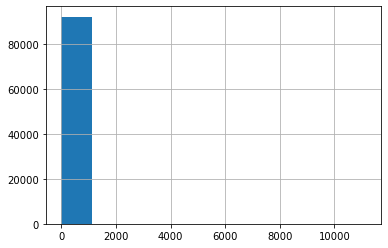

In [19]:
user_cnt['count'].hist()

# 특정 범위에 분포하는 데이터가 유독 많아서 막대가 하나만 출력
# 데이터 빈도값의 격차가 너무 커서 실제로 뒤에 존재하는 값이 보이지 x

<AxesSubplot:>

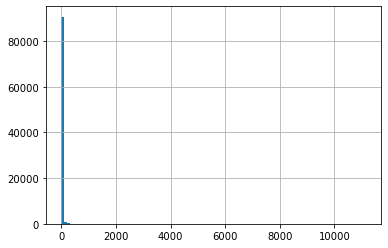

In [20]:
user_cnt['count'].hist(bins=100)

# bins 값을 늘려도 여전히 큰 데이터와 작은 데이터의 격차가 매우 커서 효과 x

# 히스토그램에 적용된 방식은 Linear Scale 방식
# 해결 방법: log scale -> 눈금 당 배수로 증가하므로 광범위한 데이터의 분포 확인 가능

<AxesSubplot:>

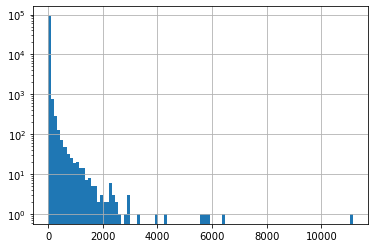

In [21]:
# log scale 활용 -> 빈도의 격차가 큰 데이터를 확인할 때 유용하게 사용 가능
user_cnt['count'].hist(bins=100, log=True)

# 대다수의 데이터가 추천 시스템에 필요 없는, 의사결정에 기여하지 못하는 count=1인 데이터
# 파레토 분포의 형태 -> 부의 분배를 나타내기 위한 분포
# 극소수의 부자와 무수한 가난한 사람들 -> 불공평한 분배

# ex) youtube에 댓글을 다는 사람은 전체 youtube 유저 대비 극소수에 불과

In [22]:
len(user_cnt.loc[user_cnt['count'] == 1])

# 전체 9만여 개의 데이터 중에서 의사결정에 기여하지 못하는 데이터가 절반 이상

51270

In [23]:
# 범위를 늘려서 count 10 이하의 데이터를 모두 확인
len(user_cnt.loc[user_cnt['count'] <= 10])

# 일반적으로 범위 설정은 도메인 지식을 기반으로 수행
# 지금은 임의로 10회 이하의 데이터를 의사결정에 기여하지 못하는 데이터로 판단

81264

#### Item-Based
- item 대상으로 count 확인

In [24]:
combined['count'] = 1
book_cnt = combined.groupby('Book-Title').agg({'count':np.sum}).reset_index()
book_cnt.sort_values(by='count')

,Book-Title,count
72330,Gabriel's Lament (King Penguin S.),1
183345,The Crystal Children: A Guide to the Newest Ge...,1
183347,The Crystal Desert,1
85862,House Construction Details,1
85861,"House Cleaning Made Easy: Tips, Tricks and Str...",1
...,...,...
199237,The Nanny Diaries: A Novel,828
5303,A Painted House,838
183573,The Da Vinci Code,898
196326,The Lovely Bones: A Novel,1295


<AxesSubplot:>

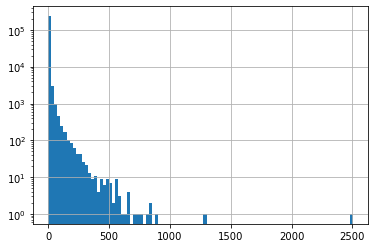

In [25]:
book_cnt['count'].hist(bins=100, log=True)

# 마찬가지로 파레토 분포의 형태

In [26]:
len(book_cnt.loc[book_cnt['count'] == 1])

127513

In [27]:
len(book_cnt.loc[book_cnt['count'] <= 10])

225556

In [28]:
book_cnt.loc[book_cnt['count'] > 10]

,Book-Title,count
22,Murder of a Sleeping Beauty (Scumble River My...,11
26,"Q-Space (Star Trek The Next Generation, Book 47)",17
27,"Q-Zone (Star Trek The Next Generation, Book 48)",11
44,!Yo!,11
75,'Salem's Lot,47
...,...,...
240955,e,44
240978,iI Paradiso Degli Orchi,27
240999,one hundred years of solitude,21
241008,stardust,51


In [29]:
# 연결고리가 최소 조건 이상을 충족하는 것들만 filtering
# 인기 있는 책: 10번 위로 선택된 책
# 헤비 유저: 책을 10권 위로 읽은 유저

# 10번 위로 선택된 책의 제목을 확인
pop_books = book_cnt.loc[book_cnt['count'] > 10]['Book-Title']

# 10권 위로 책을 읽은 고객의 ID를 확인
heavy_user = user_cnt.loc[user_cnt['count'] > 10]['User-ID']

In [30]:
pop_books

22         Murder of a Sleeping Beauty (Scumble River My...
26         Q-Space (Star Trek The Next Generation, Book 47)
27          Q-Zone (Star Trek The Next Generation, Book 48)
44                                                     !Yo!
75                                             'Salem's Lot
                                ...                        
240955                                                    e
240978                              iI Paradiso Degli Orchi
240999                        one hundred years of solitude
241008                                             stardust
241025                     why I'm like this : True Stories
Name: Book-Title, Length: 15515, dtype: object

In [31]:
heavy_user

1             8
42           99
82          242
83          243
87          254
          ...  
92027    278633
92030    278637
92070    278771
92099    278843
92103    278851
Name: User-ID, Length: 10842, dtype: int64

In [32]:
# 분석에 사용할 필터링된 데이터
u_filter = combined.loc[combined['User-ID'].isin(heavy_user)]
filtered = u_filter.loc[u_filter['Book-Title'].isin(pop_books)]
filtered

,User-ID,Book-Rating,Book-Title,count
1,2313,5,Flesh Tones: A Novel,1
2,6543,0,Flesh Tones: A Novel,1
3,8680,5,Flesh Tones: A Novel,1
4,10314,9,Flesh Tones: A Novel,1
5,23768,0,Flesh Tones: A Novel,1
...,...,...,...,...
1031125,276688,0,Coyote Waits,1
1031126,276688,0,Sacred Clowns,1
1031128,276688,0,Mrs. Pollifax and the Second Thief,1
1031131,276688,0,Mostly Harmless,1


#### 피벗테이블 생성

In [33]:
pvt = filtered.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
pvt

Book-Title,Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: The Novel of the Millennium,"1,000 Places to See Before You Die",10 Lb. Penalty,100 Malicious Little Mysteries,...,"\A\"" is for Alibi : A Kinsey Millhone Mystery (A Kinsey Millhone Mystery)""","\Girls' Night Out\""/\""Boys' Night In\""""","\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""",e,iI Paradiso Degli Orchi,one hundred years of solitude,stardust,why I'm like this : True Stories
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Item-Based

In [ ]:
item_corr = pvt.corr()
item_corr.head()

#### User-Based

In [ ]:
user_corr = pvt.T.corr()
user_corr.head()

In [ ]:
# 셀 실행이 너무 오래 걸리면 의미 있는 데이터의 기준을 조정(ex: 50번/권 이상)
# 산출된 상관계수/유사도를 바탕으로 연결고리 패턴을 만들어 추천 수행